## Credit Risk Prediction Project 


### Content table 
- 1. Introduction.
- 2. Data Exploration.
- 3. Getting  the dataset and data general analysis.
- 4. Project Objectives.
- 5. Data importation and classification.
- 6. Models implementation.
- 7. Models Evaluation.
- 8. Conclusion. 


### Introduction

This project develop a predictive model for credit risk assessment using **"german.data"** dataset from UCI Machine Learning Repository. Credit risk prediction is crucial for financial institution to determine if  the users will default on their loan obligations. Accurate prediction can help to minimize financial losses and making informed lending decisions.

### Data Exploration

The **"german.data"** dataset contains information about 1000 loan applicants. Each Applicant is described by 20 attributes that includes various socio-demographic and financial factors. The target variable indicates whether the applicant is consider a good o bad credit risk.

Dataset structure: 
- CheckingAccountStatus: Status of the checking account (e.g., no checking account, < 0 DM, 0 <= x < 200 DM, >= 200 DM)
- DurationInMonths: Duration of the credit in months
- CreditHistory: Status of the applicant's credit history (e.g., no credits/all paid, existing paid, critical/other existing credit)
- Purpose: Purpose of the credit (e.g., car, education, furniture/equipment)
- CreditAmount: Amount of credit requested
- SavingsAccountBonds: Status of savings accounts/bonds (e.g., < 100 DM, 100 <= x < 500 DM, >= 1000 DM)
- Employment: Present employment since (e.g., unemployed, < 1 year, >= 7 years)
- InstallmentRatePercentage: Installment rate in percentage of disposable income
- PersonalStatusSex: Personal status and sex (e.g., male single, female divorced/separated/married)
- OtherDebtorsGuarantors: Other debtors/guarantors (e.g., none, co-applicant, guarantor)
- ResidenceSince: Number of years the applicant has lived in the current residence
- Property: Nature of property owned (e.g., real estate, if not rent, if not own, unknown/no property)
- Age: Age of the applicant in years
- OtherInstallmentPlans: Other installment plans (e.g., bank, stores, none)
- Housing: Housing situation (e.g., rent, own, for free)
- NumberOfExistingCredits: Number of existing credits at this bank
- Job: Applicant's job (e.g., unemployed, unskilled non-resident, skilled, highly qualified)
- PeopleUnderMaintenance: Number of people being maintained by the applicant
- Telephone: Whether the applicant has a telephone (e.g., none, yes)
- ForeignWorker: Whether the applicant is a foreign worker (e.g., yes, no)
- CreditRisk: The target variable indicating credit risk (1 for good, 2 for bad)


for more information about  variable classification , you can visit [UCI Machine Learning Repository - Statlog (German Credit Data)](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data).

### Project Objectives 
1. **Data Preprocessing** : Clean and preprocess  the dataset to handle missing values, encodes categorical variables, and scale numerical features
2. **Model Training**: Train multiple machine learning models to predict credit risk.
    - Random Forest Classifier
    - Support Vector Machine(SVM) Classifier
    - Naive Bayes Classifier
3. **Model Evaluation**: Evaluate the performance of the trained models using appropriate metrics.
4. **API Development** : Develop a FastAPI application to serve the trained models and provide credit risk predictions
5. **Documentation** : Use Jupyter Notebook to document the entire process 

### Data importation and classification

In this section, we import the essential libraries for the project, including Pandas, Matplotlib, Sklearn, and NumPy, along with the specific modules required from each library.

In [2]:
!pip install numpy 
!pip install pandas 
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report, precision_score , recall_score, f1_score , roc_auc_score, roc_curve


In [4]:
column_names = [
    'CheckingAccountStatus', 'DurationInMonths', 'CreditHistory', 'Purpose', 'CreditAmount',
    'SavingsAccountBonds', 'Employment', 'InstallmentRatePercentage', 'PersonalStatusSex',
    'OtherDebtorsGuarantors', 'ResidenceSince', 'Property', 'Age', 'OtherInstallmentPlans',
    'Housing', 'NumberOfExistingCredits', 'Job', 'PeopleUnderMaintenance', 'Telephone', 'ForeignWorker', 'CreditRisk'
]

data = pd.read_csv('german.data', sep=' ', header=None, names=column_names, na_values='?')


data.dropna(inplace = True)


We start by defining the column names for the dataset to make it easier to work with. We then read the dataset using pandas, specifying the column names and treating ? as NaN values. Finally, we remove any rows with missing values


In this section, we prepare the dataset for model training. First, we define the variables "X" and "y". The variable "X" includes all the columns except the last one because that column contains the values we want to predict, which is represented by "y"

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]


Then, we transform y because it might be categorical. We adjust the values so that 0 represents good credit risk and 1 represents bad credit risk.

In [6]:
y = y - 1 

We separate the data in training set and test set using "train_test_split" from sklearn library 

In [7]:
X_train ,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2 , random_state=0)

Then, we group the features into categorical and numerical variables to apply the appropriate transformer:

In [8]:
categorical_features = [
    'CheckingAccountStatus', 'CreditHistory', 'Purpose', 'SavingsAccountBonds', 'Employment',
    'PersonalStatusSex', 'OtherDebtorsGuarantors', 'Property', 'OtherInstallmentPlans',
    'Housing', 'Job', 'Telephone', 'ForeignWorker'
]
numeric_features = [
    'DurationInMonths', 'CreditAmount', 'InstallmentRatePercentage', 'ResidenceSince', 'Age', 'NumberOfExistingCredits', 'PeopleUnderMaintenance'
]


Next, we create the column transformer:

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


After that, we adjust each preprocessor in X_train and X_test 

In [10]:
# Adjust y transform the train data 
X_train = preprocessor.fit_transform(X_train)

# Transform the test data 
X_test = preprocessor.transform(X_test)




We define and train multiple models to compare their performance. The models we use are:

In [11]:
#We call each model 
models  = [('Random Forest ',RandomForestClassifier()),
           ('Suport Vector Machine',SVC(kernel='rbf',random_state=0, probability = True)),
           ('Naive Bayes ',GaussianNB())]



Next, we initialize an empty dictionary to store the results of each model:

In [12]:
results = {}

We then iterate over each model, train it, and evaluate its performance using various metrics:

In [13]:
#Create a "for" to call and adjust each model 

for name, model in models :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred) if y_proba is not None else None,
        'confusion matrix':confusion_matrix(y_test, y_pred)
        
        
        }


This code block trains each model on the training set, makes predictions on the test set, and calculates various performance metrics such as accuracy, precision, recall, F1 score, ROC-AUC score, and confusion matrix. The results are then stored in the results dictionary for easy comparison.

We then print the performance metrics for each model:

In [14]:

for name, metrics in results.items():
    print(f"model:{name}")
    for metric,value in metrics.items():
        print(f"{metric}:{value}")
    print("\n")


model:Random Forest 
Accuracy:0.755
Precision:0.6153846153846154
Recall:0.41379310344827586
F1:0.4948453608247423
ROC-AUC:0.6540796503156872
confusion matrix:[[127  15]
 [ 34  24]]


model:Suport Vector Machine
Accuracy:0.77
Precision:0.65
Recall:0.4482758620689655
F1:0.5306122448979592
ROC-AUC:0.6748421563865955
confusion matrix:[[128  14]
 [ 32  26]]


model:Naive Bayes 
Accuracy:0.685
Precision:0.46987951807228917
Recall:0.6724137931034483
F1:0.5531914893617021
ROC-AUC:0.6812773190869355
confusion matrix:[[98 44]
 [19 39]]




This code iterates through the results dictionary and prints the performance metrics for each model.

Results interpretation:
Each model has its strengths and weaknesses, which can vary depending on the specific needs of the project:
- **Support Vector Machine (SVM):**

It has the highest accuracy and a good balance between recall and F1-Score.
It would be a good option if the goal is to maximize accuracy while maintaining a good overall balance.
- **Random Forest:**

It has a good overall balance and slightly higher ROC-AUC.
It could be a good option if you value a balance across all metrics.
- **Naive Bayes:**

It has the best recall, which indicates it identifies more positive cases.
It might be the best choice if the goal is to minimize false negatives (maximize recall).



Next, we plot the ROC curves for the models that support probability predictions:

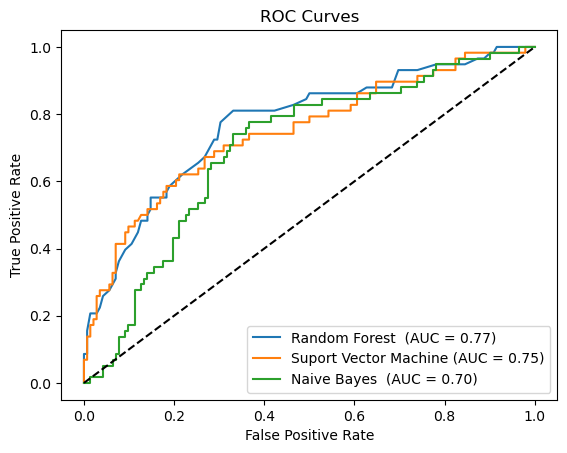

In [15]:
plt.figure()
for name, model in models:
    if hasattr(model, 'predict_proba'):
        y_proba  = model.predict_proba(X_test)[:,1]
        fpr,tpr,_ = roc_curve(y_test, y_proba)
        plt.plot(fpr,tpr, label = f'{name} (AUC = {roc_auc_score(y_test,y_proba):0.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()




We add a diagonal line for reference, set the labels and title, and display the legend:

## **Conclusion of the Credit Risk Prediction Project**

In this project, we developed and evaluated several classification models to predict credit risk using a specific dataset. We implemented three main models: Random Forest, Support Vector Machine (SVM), and Naive Bayes. Through detailed analysis, we derived the following key conclusions:

### **1. Models and Performance Metrics:**
   - **Random Forest** demonstrated solid balance across all metrics, particularly excelling in the area under the ROC curve (ROC-AUC). This model is a reliable choice when seeking a general balance in credit risk prediction.
   - **Support Vector Machine (SVM)** offered the highest accuracy and a good balance between recall and F1-Score, making it ideal in scenarios where accuracy is paramount without sacrificing too much in other metrics.
   - **Naive Bayes** excelled in recall, indicating that it is the best model for correctly identifying positive cases (high credit risk). This model is especially useful if the goal is to minimize false negatives, ensuring that high-risk cases are not misclassified as low risk.

### **2. Interpretation of Results:**
   - Each model has its strengths and weaknesses, suggesting that model selection should depend on business or project priorities. For instance, if avoiding false negatives is crucial (e.g., a lender not wanting to miss high-risk clients), Naive Bayes would be preferable. If a balanced performance across all aspects is desired, Random Forest is a strong choice.

### **3. Visualization and Comparison:**
   - The ROC curves allowed us to visualize and compare the models' ability to distinguish between positive and negative cases. This tool is particularly useful for understanding how each model performs in terms of trade-offs between the true positive rate and the false positive rate.

## **Final Conclusion:**
The project demonstrates that there is no single "best" model for all situations. Instead, the optimal model choice depends on the specific objectives of the credit risk analysis. This approach not only provides a comprehensive view of model performance but also enables informed decision-making regarding which model to use based on the specific needs and priorities of the business.
